In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl

In [25]:
## import dataset from xlsx file
CMDterrain1 = pd.read_excel('CMD_final_a3.xlsx')
CMDterrain1.describe()

,Northing,Easting,Altitude,Time,Cond.1[mS/m],Inph.1[ppt],Cond.2[mS/m],Inph.2[ppt],Cond.3[mS/m],Inph.3[ppt],Inv.Cond.1[mS/m],Inv.Cond.2[mS/m],Inv.Thick [m],Inv.RMS[%],Note
count,1.709000e+03,1709.000000,1709.000000,0.0,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,0.0
mean,5.290007e+06,462378.347706,2.410278,NaN,154.731621,2.944564,160.005746,11.665892,159.544008,34.318537,112.723125,895.704178,2.558163,4.746460,NaN
std,2.542783e+01,43.245165,0.231781,NaN,55.657542,0.480020,45.902965,3.067305,31.652995,8.539314,92.356720,975.681015,0.950711,1.532797,NaN
min,5.289959e+06,462296.900100,1.813000,NaN,62.240000,2.100000,76.230000,6.210000,91.580000,17.520000,6.090000,0.860000,0.300000,0.700000,NaN
25%,5.289985e+06,462341.647400,2.251000,NaN,114.380000,2.620000,127.230000,9.620000,137.990000,28.470000,49.910000,312.010000,1.900000,3.600000,NaN
50%,5.290009e+06,462377.331000,2.406000,NaN,142.790000,2.860000,151.510000,11.230000,155.910000,33.570000,76.760000,532.360000,2.600000,4.700000,NaN
75%,5.290028e+06,462412.932900,2.563000,NaN,184.800000,3.180000,184.470000,13.180000,179.540000,38.910000,149.670000,872.080000,3.100000,5.700000,NaN
max,5.290055e+06,462474.905700,2.980000,NaN,344.270000,4.770000,317.390000,23.230000,258.860000,63.620000,479.440000,6874.670000,6.600000,9.700000,NaN


In [26]:
h=  np.linspace(0,10,100) # height

con1= np.linspace(50,340,100) # espace de recherche pour conductivité 1
con2= np.linspace(50,340,100) # espace de recherche pour conductivité 2
con3=np.linspace(50,340,100) #  espace de recherche pour conductivité 3

sp1= 1.48 # 1er ecartement
sp2 = 2.82 # 2eme ecartement
sp3 = 4.49 # 3eme ecartement

#Importation des conductivités
d1 = CMDterrain1.iloc[:,4] # conductivit 1
d2 = CMDterrain1.iloc[:,6] # conductivit 2
d3 = CMDterrain1.iloc[:,8] # conductivit 3
L=len(d1) # longueur des données
# init cond_Moy and h_moyen
conductivite=np.zeros(L)
hauteur=np.zeros(L)

In [27]:
for t in range(1,L):
    # create S1,S2 and S3 array, all 2d array of dimension 100x100
    S1=np.zeros((100,100)) # S1 initialised as 100x100 array of zeros
    S2=np.zeros((100,100)) # S2 initialised as 100x100 array of zeros
    S3=np.zeros((100,100)) # S3 initialised as 100x100 array of zeros
    
    D11=1/(1+4*((1/sp1)**2))**0.5
    D12=1/(1+4*((1/sp2)**2))**0.5
    D13=1/(1+4*((1/sp3)**2))**0.5
    D21=1./(1+4*(((h+1)/sp1)**2))**0.5
    D22=1./(1+4*(((h+1)/sp2)**2))**0.5
    D23=1./(1+4*(((h+1)/sp3)**2))**0.5

    


    for  i in range(1,100):
        for j in range(1,100):
            S1[i,j]= np.exp(-0.5*((d1[t]-con1[j]*(D11-(D21[i])))/2)**2) # S1
            S2[i,j]= np.exp(-0.5*((d2[t]-con2[j]*(D12-(D22[i])))/2)**2) # S2
            S3[i,j]= np.exp(-0.5*((d3[t]-con3[j]*(D13-(D23[i])))/2)**2) # S3

    # S as join
    S=S1*S2*S3 # S as join

    ## init P1 and P2 as 1d array
    P1 = np.zeros(100) # P1 initialised as 100x1 array of zeros
    P2 = np.zeros(100) # P2 initialised as 100x1 array of zeros

    for k in range(100):
        P1[k] = sum(S[k,:]) # P1
        P2[k] = sum(S[:,k]) # P2


    P1=P1/sum(P1)
    P2=P2/sum(P2)
    
    # elementwise multiplication of cond and P1, and h and P2
    conductivite[t]=np.sum(cond*P1) # cond_Moy
    hauteur[t]=np.sum(h*P2) # h_moyen

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


In [28]:
## create a dataframe named Resultat
Resultat=pd.DataFrame({'X':CMDterrain1.iloc[:,0], 'Y':CMDterrain1.iloc[:,1],'conductivite':conductivite,'hauteur':hauteur}, index=None).iloc[1:,:]
Resultat=Resultat.dropna()
# remove the last character from X1 and X2
for i in range(len(Resultat)):
    #convert to string and remove last character from first col
    Resultat.iloc[i, 0] = str(Resultat.iloc[i, 0])[:-1]
    Resultat.iloc[i, 0] = float(Resultat.iloc[i, 0])
    
    Resultat.iloc[i, 1]=  str(Resultat.iloc[i,1])[:-1]
    Resultat.iloc[i, 1] = float(Resultat.iloc[i, 1])

Resultat.head(10)

,X,Y,conductivite,hauteur
1,5.28996e+06,462300,308.206352,5.083379
2,5.28996e+06,462301,308.530318,5.362954
3,5.28996e+06,462303,259.137000,6.149423
4,5.28996e+06,462304,206.190607,7.375852
5,5.28996e+06,462306,161.637398,9.606480
6,5.28996e+06,462307,168.924668,9.987411
7,5.28996e+06,462309,179.369438,9.997364
8,5.28996e+06,462310,195.953290,9.999691
9,5.28996e+06,462312,222.158785,9.999964
10,5.28996e+06,462313,242.528487,9.999975


C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


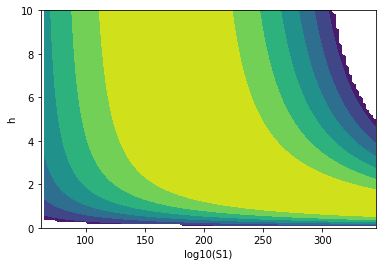

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


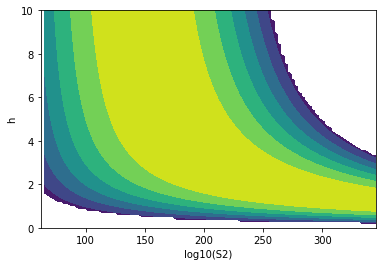

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


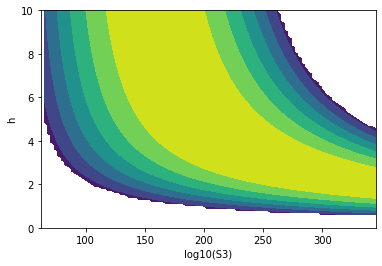

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


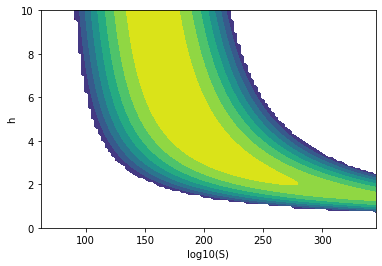

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10


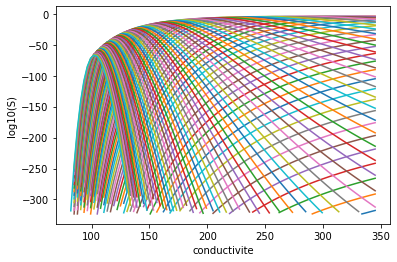

In [33]:
plt.figure()
v,w=np.meshgrid(cond, h)

plt.contourf(v,w,np.log10(S1))
plt.xlabel("log10(S1)")
plt.ylabel("h")
plt.show()
plt.contourf(v,w,np.log10(S2))
plt.xlabel("log10(S2)")
plt.ylabel("h")
plt.show()
plt.contourf(v,w,np.log10(S3))
plt.xlabel("log10(S3)")
plt.ylabel("h")
plt.show()
plt.contourf(v,w,np.log10(S))
plt.xlabel("log10(S)")
plt.ylabel("h")
plt.show()
plt.plot(cond,np.log10(S))
plt.xlabel("conductivite")
plt.ylabel("log10(S)")
plt.show()

In [ ]:
## save Resultat as xlsx file "Resultat_CMD_a1.xlsx"
Resultat.to_excel('Resultat_CMD_a3.xlsx') # save Resultat as xlsx file "Resultat_CMD_a1.xlsx"